In [2]:
# 1.使用second_cars_info.csv制作一个查询引擎，可以通过输入指定的参数获取对应条目的结果。
import pandas as pd 

data = pd.read_csv("second_cars_info.csv")#导入数据

#字符串数据转换为日期
data["Boarding_time"].where(data["Boarding_time"]!="未上牌","2030年1月",inplace=True)#使用where替换
data.Boarding_time = pd.to_datetime(data["Boarding_time"],format="%Y年%m月").map(str).str.slice(0,7)
data["Boarding_time"].where(data["Boarding_time"]!="2030-01",pd.NA,inplace=True)#使用where将未上牌数值替换为空
data.sort_values("Boarding_time",inplace=True)#按照时间排序

#字符串数据转换为数值
data["Km"].where(data["Km"]!="百公里内","0.009万公里",inplace=True)#使用where替换
data.Km = data["Km"].apply(lambda x:float(x[:-3])*10000)#里程转换为数值

data["New_price"].where(data["New_price"]!="暂无","0.00万",inplace=True)#使用where替换
data.New_price = data["New_price"].apply(lambda x:float(x[:-1]))#现价转换为数值
data["New_price"].where(data["New_price"]!=0.00,pd.NA,inplace=True)#使用where将现价暂无替换空

def query(key):
    q = []
    li1 = key.split(";")#拆分检索字段
    for i in li1:
        li2 = i.split("=")#取出字段名称和筛选条件
        if li2[0] in ["Boarding_time","Km","Sec_price","New_price"]:
            li3 = li2[-1][1:-1].split(":")
            if len(li3)==1:
                q.append('(data["{}"]=={})'.format(str(li2[0]),li3[0]))
            else:
                if li3[0]=="":
                    q.append('(data["{}"]<{})'.format(str(li2[0]),li3[-1]))
                elif li3[-1]=="":
                    q.append('(data["{}"]>={})'.format(str(li2[0]),li3[0]))
                else:
                    q.append('(data["{}"]>={})'.format(str(li2[0]),li3[0]))
                    q.append('(data["{}"]<{})'.format(str(li2[0]),li3[-1]))
            
        else:
            q.append('(data["{}"].isin({}))'.format(str(li2[0]),li2[-1]))
    q = '&'.join(q)#重新拼接查询条件
    df = data[eval(q)]#查询结果
    df = pd.pivot_table(df,index=["Brand","Name"])#绘制透视表
    return df
if __name__=="__main__":
    quit = ''
    while quit!='q':
        key = str(input("查询条件"))
        try:
            df = query(key)
            print(df)
        except:
            print("没有满足条件的记录，请核对查询条件")
        quit=input("回车(继续)\q(退出)")
#运行程序，输入查询条件：
#例：Brand=["奔驰","大众"];Km=[1000:]---查询Brand为"奔驰"和"大众"并且里程大于1000公里的记录。
#Brand=["奔驰","大众"];Km=[1000:2000]---查询Brand为"奔驰"和"大众"并且里程大于等于1000公里小于2000公里的记录。
#Brand=["奔驰","大众"];Km=[1000:2000];New_price=[100:200]---查询Brand为"奔驰"和"大众"并且里程大于等于1000公里小于2000公里，现价在100-200万之间的记录。

                                      Km  New_price  Sec_price
Brand Name                                                    
大众    POLO 2002款 1.4两厢手动基本型     170000.0      11.27      1.680
      POLO 2002款 1.4两厢手动舒适型     120000.0      10.84      1.050
      POLO 2002款 1.4两厢自动舒适型     136000.0      12.26      1.200
      POLO 2002款 1.6两厢手动舒适型     180000.0      11.94      1.000
      POLO 2003款 1.4三厢手动舒适型     115000.0      12.24      1.400
...                                  ...        ...        ...
奔驰    迈巴赫S级 2015款 400 4MATIC     41950.0     156.09    136.725
      迈巴赫S级 2015款 600            19900.0     313.48    316.100
      迈巴赫S级 2016款 400 4MATIC     55500.0     159.35    139.800
      迈巴赫S级 2017款 S 500 4MATIC    6900.0     238.59    269.000
      迈巴赫S级 2017款 S 600           2000.0     313.48    378.000

[796 rows x 3 columns]


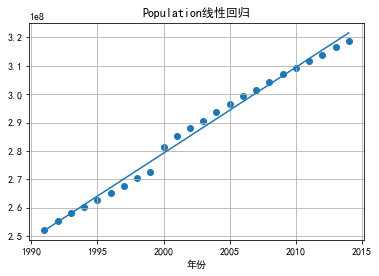

2019年Population预测值： 336803473


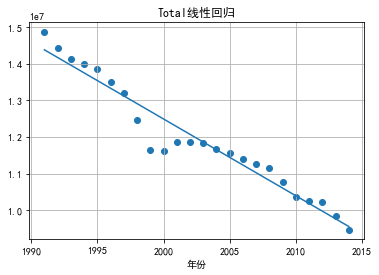

2019年Population预测值：336803473
2019年Total预测值： 8509958
2019年Total犯罪率预测值：2.5267%


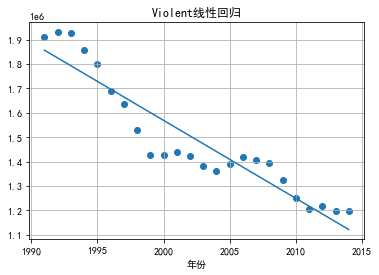

2019年Population预测值：336803473
2019年Violent预测值： 961797
2019年Violent犯罪率预测值：0.2856%


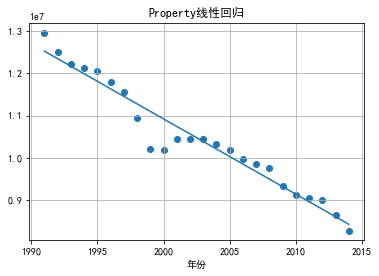

2019年Population预测值：336803473
2019年Property预测值： 7534743
2019年Property犯罪率预测值：2.2371%


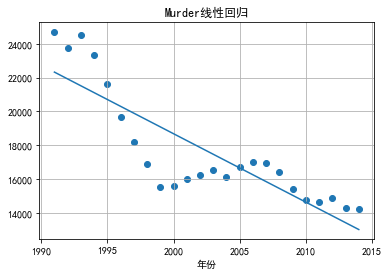

2019年Population预测值：336803473
2019年Murder预测值： 11003
2019年Murder犯罪率预测值：0.0033%


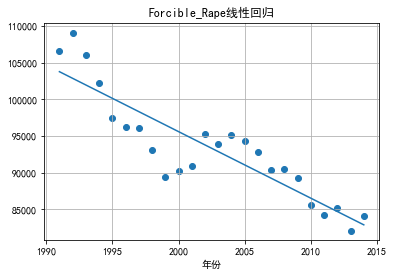

2019年Population预测值：336803473
2019年Forcible_Rape预测值： 78346
2019年Forcible_Rape犯罪率预测值：0.0233%


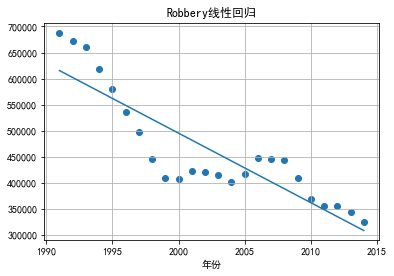

2019年Population预测值：336803473
2019年Robbery预测值： 241981
2019年Robbery犯罪率预测值：0.0718%


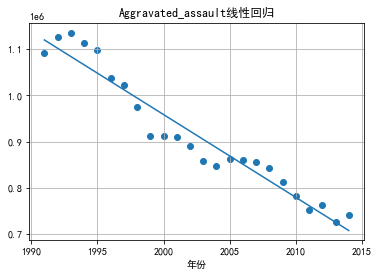

2019年Population预测值：336803473
2019年Aggravated_assault预测值： 617612
2019年Aggravated_assault犯罪率预测值：0.1834%


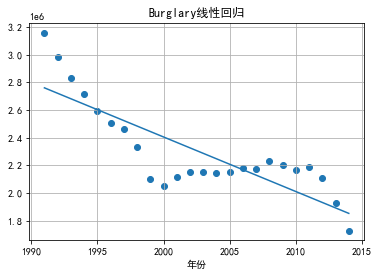

2019年Population预测值：336803473
2019年Burglary预测值： 1656630
2019年Burglary犯罪率预测值：0.4919%


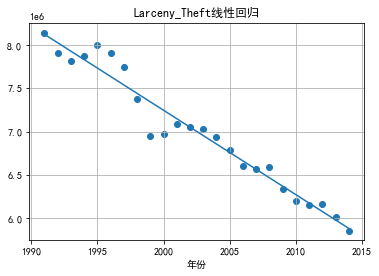

2019年Population预测值：336803473
2019年Larceny_Theft预测值： 5395802
2019年Larceny_Theft犯罪率预测值：1.6021%


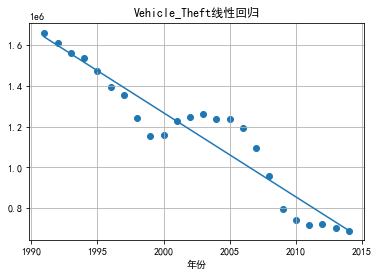

2019年Population预测值：336803473
2019年Vehicle_Theft预测值： 482845
2019年Vehicle_Theft犯罪率预测值：0.1434%


In [4]:
# 2.使用US_Crime_Rates_1960_2014.csv，根据1991-2014年的数据制作一条回归曲线，预测2019年的各个犯罪条目的犯罪率。
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False #显示负号
plt.rcParams['font.sans-serif']=['SimHei'] #中文显示

data = pd.read_csv(r"US_Crime_Rates_1960_2014.csv")#读取数据文件
data = data[(data["Year"]>=1991)]#取1991以后数据
Population=0
for k in data.columns[1:]:#遍历各犯罪字段
    x = data["Year"]
    y = data[k]
    slope,intercept,r,p,std_err=stats.linregress(x,y)#回归拟合，取模型参数
    def myfunc(x):#回归函数
        return slope*x+intercept
    mymodel = list(map(myfunc,x))
    plt.scatter(x,y)#绘制散点图
    plt.plot(x,mymodel)#回归线
    plt.title("{}线性回归".format(k))#标题
    plt.xlabel("年份")#x轴标题
    plt.grid()#网格线
    plt.show()#绘图
    num = int(myfunc(2019))#预测值
    if k == "Population":
        print("2019年{}预测值：".format(k),num)
        Population = num#2019人数预测
    else:
        print("2019年Population预测值：{}".format(Population))#2019人数预测
        print("2019年{}预测值：".format(k),num)#预测值
        print("2019年{}犯罪率预测值：{}%".format(k,round(100*num/Population,4)))#计算犯罪率
        